**Python libraries**
---


In [1]:
!pip install transformers

In [ ]:
!pip install lime

In [ ]:
!pip install anchor-exp

In [ ]:
!pip install torch transformers spacy && python -m spacy download en_core_web_lg

2023-08-19 07:27:25.906049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
!pip install torch transformers spacy && python -m spacy download en_core_web_sm

2023-08-19 07:27:53.138024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [2]:
import numpy as np
import pandas as pd
#import torch
#import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
#device = torch.device("cuda")

In [ ]:
! pip install eli5==0.13.0
! pip install jinja2==3.0.0

In [ ]:
import scipy
import numpy as np
def monkeypath_itemfreq(sampler_indices):
   return zip(*np.unique(sampler_indices, return_counts=True))

scipy.stats.itemfreq=monkeypath_itemfreq

**Load Data**
---



In [3]:
#from transformers import AutoTokenizer,TFAutoModel
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
device = torch.device("cuda")
#df=pd.read_csv("covid_kd_val.csv",usecols=["data","label"])
from sklearn.model_selection import train_test_split

df_train=pd.read_csv("COVID_19_Fake_News_Data_aa1_train.csv",usecols=["data","label"])
df_val=pd.read_csv("COVID_19_Fake_News_Data_aa1_val.csv",usecols=["data","label"])
df_test=pd.read_csv("COVID_19_Fake_News_Data_aa1_test.csv",usecols=["data","label"])
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(6420, 2)
(2140, 2)
(2140, 2)


In [4]:
# Mapping dictionary
label_map = {'real': 0, 'fake': 1}
# Apply the mapping to the 'label' column
df_train['label'] = df_train['label'].map(label_map)
df_train['label'].value_counts()

label
0    3360
1    3060
Name: count, dtype: int64

In [5]:
# Mapping dictionary
label_map = {'real': 0, 'fake': 1}
# Apply the mapping to the 'label' column
df_val['label'] = df_val['label'].map(label_map)
df_val['label'].value_counts()

label
0    1120
1    1020
Name: count, dtype: int64

In [6]:
# Mapping dictionary
label_map = {'real': 0, 'fake': 1}
# Apply the mapping to the 'label' column
df_test['label'] = df_test['label'].map(label_map)
df_test['label'].value_counts()

label
0    1120
1    1020
Name: count, dtype: int64

In [7]:
df_train.columns
df_val.columns
df_test.columns

Index(['data', 'label'], dtype='object')

In [8]:
import torch
import torch.nn as nn
from transformers import BertTokenizerFast, BertModel, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
#from transformers import AutoTokenizer,TFAutoModel
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
device = torch.device("cuda")

model_name="bert-base-uncased"
bert = AutoModel.from_pretrained(model_name)
tokenizer = BertTokenizerFast.from_pretrained(model_name)

# Tokenize and encode the data
max_seq_len = 256  # Adjust as needed

def tokenize_data(text):
    tokens = tokenizer.batch_encode_plus(
        text.tolist(),
        max_length=max_seq_len,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    return tokens['input_ids'], tokens['attention_mask']

train_seq, train_mask = tokenize_data(df_train['data'])
val_seq, val_mask = tokenize_data(df_val['data'])
test_seq, test_mask = tokenize_data(df_test['data'])

# Convert labels to tensors
train_labels_tensor = torch.tensor(df_train['label'].tolist())
val_labels_tensor = torch.tensor(df_val['label'].tolist())
test_labels_tensor = torch.tensor(df_test['label'].tolist())

# Create datasets
train_dataset = TensorDataset(train_seq, train_mask, train_labels_tensor)
val_dataset = TensorDataset(val_seq, val_mask, val_labels_tensor)
test_dataset = TensorDataset(test_seq, test_mask, test_labels_tensor)

# Create data loaders
batch_size = 32  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [9]:

# Define the BERT architecture
class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 2)  # Assuming 2 classes (binary classification)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.fc1(pooled_output)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x
# Instantiate the BERT model
model = BERT_Arch(bert)
model=model.to(device)
# Define loss function and optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)  # Adjust learning rate as needed
criterion = nn.NLLLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
# Training function
def train_model(model, train_dataloader, val_dataloader, criterion, optimizer, device, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            input_ids, attention_mask, labels = batch
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_dataloader)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}')

        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for batch in val_dataloader:
                batch = tuple(t.to(device) for t in batch)
                input_ids, attention_mask, labels = batch
                outputs = model(input_ids, attention_mask)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_acc = accuracy_score(val_labels, val_preds)
        print(f'Validation Accuracy: {val_acc:.4f}')
        print(classification_report(val_labels, val_preds))

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device)


Epoch 1/10, Training Loss: 0.2579
Validation Accuracy: 0.9477
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1120
           1       0.93      0.97      0.95      1020

    accuracy                           0.95      2140
   macro avg       0.95      0.95      0.95      2140
weighted avg       0.95      0.95      0.95      2140

Epoch 2/10, Training Loss: 0.0823
Validation Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1120
           1       0.97      0.93      0.95      1020

    accuracy                           0.95      2140
   macro avg       0.95      0.95      0.95      2140
weighted avg       0.95      0.95      0.95      2140

Epoch 3/10, Training Loss: 0.0514
Validation Accuracy: 0.9603
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1120
           1       0.96      0.95      0.96      10

In [11]:
def evaluate_test(model, test_loader, device):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for batch in test_loader:
            batch = tuple(t.to(device) for t in batch)
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())
    test_acc = accuracy_score(test_labels, test_preds)
    print(f'Test Accuracy: {test_acc:.4f}')
    print(classification_report(test_labels, test_preds))
    return test_preds  # Return predictions

# Assuming 'model', 'test_loader', and 'device' are already defined
test_predictions = evaluate_test(model, test_loader, device)

# Load the test DataFrame that matches the order and number of test_loader
#df_test = pd.read_csv("covid_kd_test.csv", usecols=["data", "label"])

# Add the predictions to the DataFrame
#df_test['predicted'] = test_predictions  # Make sure lengths match

# Save the DataFrame with predictions to a new CSV file
##df_test.to_csv("covid_kd_test_with_predictions.csv", index=False)

#print("CSV file with predictions saved successfully.")


Test Accuracy: 0.9673
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1120
           1       0.97      0.96      0.97      1020

    accuracy                           0.97      2140
   macro avg       0.97      0.97      0.97      2140
weighted avg       0.97      0.97      0.97      2140



In [13]:
import matplotlib.pyplot as plt
#BART AIII
epochs = list(range(1, 12))
training_loss1 = [0.5,0.3214, 0.1119, 0.0786, 0.0471, 0.0348, 0.0306, 0.0176, 0.0155, 0.0119, 0.0123]
validation_accuracy1 = [0.4,0.9551, 0.9598, 0.9678, 0.9561, 0.9607, 0.9673, 0.9636, 0.9682, 0.9636, 0.9570]
f1_scores1 = [0.4,0.96, 0.96, 0.97, 0.96, 0.96, 0.97, 0.96, 0.97, 0.96, 0.96]  # using weighted average f1-scores

#BART KAGGLE
training_loss2 = [0.5,0.3260, 0.1487, 0.0998, 0.0704, 0.0487, 0.0322, 0.0306, 0.0242, 0.0214, 0.0120]
validation_accuracy2 = [0.4,0.9494, 0.9605, 0.9621, 0.9671, 0.9671, 0.9688, 0.9689, 0.9703, 0.9672, 0.9674]
f1_scores2 = [0.4,0.95, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]  # using weighted average f1-scores

#BERT KAGGLE
# Extracting metrics from the provided data

training_loss3 = [0.5,0.2384, 0.0853, 0.0440, 0.0225, 0.0157, 0.0125, 0.0089, 0.0122, 0.0064, 0.0060]
validation_accuracy3 = [0.43,0.9568, 0.9626, 0.9628, 0.9639, 0.9649, 0.9649, 0.9654, 0.9662, 0.9646, 0.9655]
f1_scores3 = [0.93,0.96, 0.96, 0.96, 0.96, 0.96, 0.97, 0.97, 0.97, 0.96, 0.97]  # using weighted average f1-scores

#BERT AIII
# Extracting metrics from the provided data

training_loss4 = [0.4,0.2579, 0.0823, 0.0514, 0.0187, 0.0234, 0.0067, 0.0025, 0.0138, 0.0086, 0.003]
validation_accuracy4 = [0.434,0.9477, 0.95, 0.9603, 0.95, 0.957, 0.9565, 0.9575, 0.9374, 0.9598, 0.9626]
f1_scores4 = [0.43,0.95, 0.95, 0.96, 0.95, 0.96, 0.95, 0.96, 0.94, 0.96, 0.96]

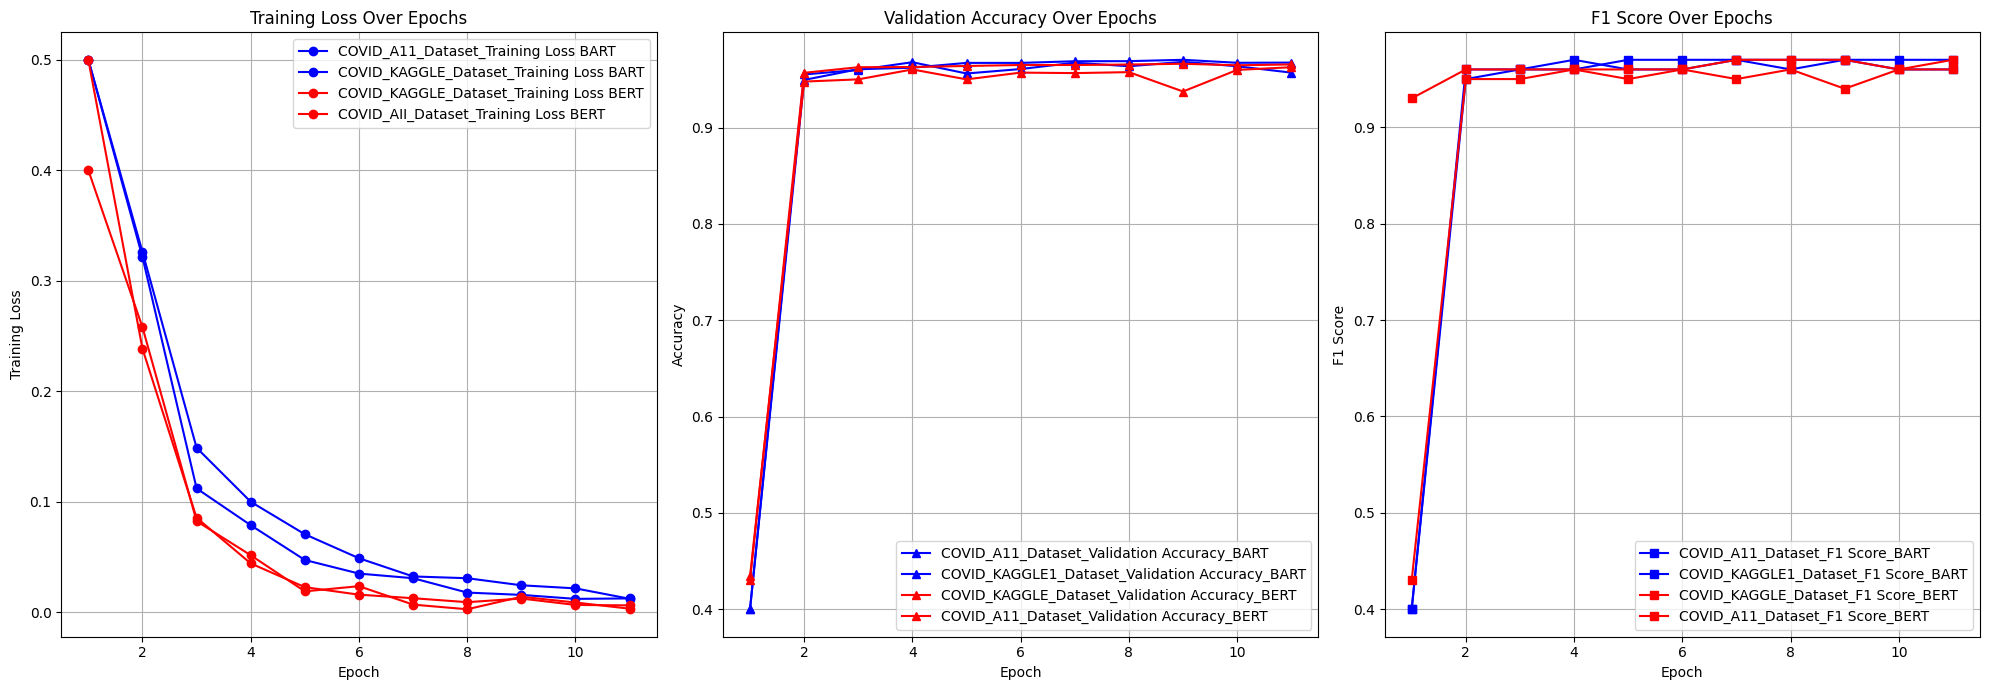

In [14]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# Plot training loss
axs[0].plot(epochs, training_loss1, marker='o', linestyle='-', color='b', label='COVID_A11_Dataset_Training Loss BART')
axs[0].plot(epochs, training_loss2, marker='o', linestyle='-', color='b', label='COVID_KAGGLE_Dataset_Training Loss BART')
axs[0].plot(epochs, training_loss3, marker='o', linestyle='-', color='r', label='COVID_KAGGLE_Dataset_Training Loss BERT')
axs[0].plot(epochs, training_loss4, marker='o', linestyle='-', color='r', label='COVID_AII_Dataset_Training Loss BERT')
axs[0].set_title('Training Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Training Loss')
axs[0].grid(True)
axs[0].legend()

# Plot validation accuracy
axs[1].plot(epochs, validation_accuracy1, marker='^', linestyle='-', color='b', label='COVID_A11_Dataset_Validation Accuracy_BART')
axs[1].plot(epochs, validation_accuracy2, marker='^', linestyle='-', color='b', label='COVID_KAGGLE1_Dataset_Validation Accuracy_BART')
axs[1].plot(epochs, validation_accuracy3, marker='^', linestyle='-', color='r', label='COVID_KAGGLE_Dataset_Validation Accuracy_BERT')
axs[1].plot(epochs, validation_accuracy4, marker='^', linestyle='-', color='r', label='COVID_A11_Dataset_Validation Accuracy_BERT')
axs[1].set_title('Validation Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].grid(True)
axs[1].legend()

# Plot F1 score
axs[2].plot(epochs, f1_scores1, marker='s', linestyle='-', color='b', label='COVID_A11_Dataset_F1 Score_BART')
axs[2].plot(epochs, f1_scores2, marker='s', linestyle='-', color='b', label='COVID_KAGGLE1_Dataset_F1 Score_BART')
axs[2].plot(epochs, f1_scores3, marker='s', linestyle='-', color='r', label='COVID_KAGGLE_Dataset_F1 Score_BERT')
axs[2].plot(epochs, f1_scores4, marker='s', linestyle='-', color='r', label='COVID_A11_Dataset_F1 Score_BERT')
axs[2].set_title('F1 Score Over Epochs')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('F1 Score')
axs[2].grid(True)
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [12]:
import torch
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the model save path in Google Drive
model_save_path = '/content/drive/My Drive/bert_model_weights_covid_AAAI_dataset.pth'

# Save the model weights
torch.save(model.state_dict(), model_save_path)
print(f"Model weights saved to {model_save_path}")


Mounted at /content/drive
Model weights saved to /content/drive/My Drive/bert_model_weights_covid_AAAI_dataset.pth


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the model load path in Google Drive
model_load_path = '/content/drive/My Drive/bert_model_weights_covid_AAAI_dataset.pth'

# Initialize the model architecture again
model = BERT_Arch(bert)
model = model.to(device)

# Load the saved weights
model.load_state_dict(torch.load(model_load_path, map_location=device))
print(f"Model weights loaded from {model_load_path}")

**LIME**
---



In [ ]:
# for LIME import necessary packages
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from sklearn.linear_model import Ridge, lars_path
from lime.lime_text import explanation
from functools import partial
import scipy as sp
from sklearn.utils import check_random_state
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
class_names = ['Real','Fake']
explainer1 = LimeTextExplainer(class_names=class_names)

In [ ]:
def tokenize_bert(x):
  tokens_test = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq = torch.tensor(tokens_test['input_ids'])
  test_mask = torch.tensor(tokens_test['attention_mask'])
  return test_seq,test_mask

In [ ]:
def predict_probab(x):
    input_ids,attention_mask=tokenize_bert(x)
    preds = model(input_ids.to(device),attention_mask.to(device))
    preds = preds.detach().cpu().numpy()
    scores = (np.exp(preds).T / np.exp(preds).sum(-1)).T
    t = torch.from_numpy(scores)
    val = t.softmax(1).detach().numpy()
    return val

Predict_prob


**Text for explanation**

1.   True Positive - "covid chinese health authorities confirm patient zero sex bats"
2.   True Negative - "  taking hot bath prevent new coronavirus disease taking hot bath prevent     "
3.   False Positive -"trump condemns anti semitism israel holocaust remembrance day"
4.   False Negative -"exposure alter structure function hemoglobin causing coronavirus patients die oxygen dep"


True Positive

In [ ]:
True_Positive ="covid chinese health authorities confirm patient zero sex bats"

In [ ]:
TP_exp = explainer1.explain_instance(True_Positive, predict_probab, num_features=10, num_samples=150)

In [ ]:
TP_exp.show_in_notebook()

In [ ]:
TP_exp.as_list()

[('covid', 0.03215992439354068),
 ('authorities', -0.030021454667592803),
 ('confirm', -0.027578531712182382),
 ('zero', -0.02473074355886326),
 ('sex', -0.02016912982576274),
 ('bats', -0.01404426855184325),
 ('chinese', -0.010195719312337566),
 ('patient', 0.005580215393026246),
 ('health', -0.003059209586121396)]

True Negative

In [ ]:
True_Negative ="taking hot bath will prevent new coronavirus disease taking hot bath prevent"

In [ ]:
TN_exp = explainer1.explain_instance(True_Negative, predict_probab, num_features=100, num_samples=150)

In [ ]:
TN_exp.show_in_notebook()

In [ ]:
TN_exp.as_list()

[('hot', 0.04497754505046496),
 ('prevent', 0.03399406819652797),
 ('taking', 0.023465068750073786),
 ('bath', 0.008329723637957177),
 ('new', 0.006800404175707702),
 ('coronavirus', -0.006351483822769761),
 ('will', -0.005732144902156015),
 ('disease', -0.0009235936508526792)]

False Positive

In [ ]:
False_Positive ="trump condemns anti semitism israel holocaust remembrance day" #False

In [ ]:
FP_exp = explainer1.explain_instance(False_Positive, predict_probab, num_features=100, num_samples=150)

In [ ]:
FP_exp.show_in_notebook()

In [ ]:
FP_exp.as_list()

[('day', -0.028131491751053537),
 ('trump', -0.028092090560143907),
 ('condemns', -0.027507986940058137),
 ('semitism', -0.01386666954203418),
 ('israel', -0.01070438565515494),
 ('anti', -0.007069298281492644),
 ('holocaust', -0.006658638885262574),
 ('remembrance', -0.003175520051504178)]

False Negative

In [ ]:
False_Negative ="exposure alter structure function hemoglobin causing coronavirus patients die oxygen dep"

In [ ]:
FN_exp = explainer1.explain_instance(False_Negative, predict_probab, num_features=100, num_samples=150)

In [ ]:
FN_exp.show_in_notebook()

In [ ]:
FN_exp.as_list()

[('oxygen', -0.026748218783850582),
 ('exposure', 0.020242375206451054),
 ('die', -0.014409015571880613),
 ('function', 0.012202461207956114),
 ('causing', 0.010447027929361046),
 ('alter', 0.008988641424892177),
 ('dep', 0.008317411852302135),
 ('patients', -0.007471912626600931),
 ('hemoglobin', 0.005734955337691638),
 ('structure', 0.003504563962677278),
 ('coronavirus', -9.680493523459629e-05)]

**ELI5**
---

In [ ]:
import scipy as sp
import torch.nn.functional as F

In [ ]:
def tokenize_bert(x):
  tokens_test = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq = torch.tensor(tokens_test['input_ids'])
  test_mask = torch.tensor(tokens_test['attention_mask'])
  return test_seq,test_mask

In [ ]:
import torch.nn.functional as F
def predict_probab(x):
  input_ids,attention_mask=tokenize_bert(x)
  out= model(input_ids.to(device),attention_mask.to(device))
  outt1 = out.detach().cpu().numpy()
  tt = torch.from_numpy(outt1)
  probs = F.softmax(tt, dim=1).cpu().numpy()
  return probs

In [ ]:
import eli5
from eli5.lime import TextExplainer
te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(True_Positive, predict_probab)
print(True_Positive)
te.show_prediction()

covid chinese health authorities confirm patient zero sex bats


In [ ]:
import eli5
from eli5.lime import TextExplainer
te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(True_Negative, predict_probab)
print(True_Negative)
te.show_prediction(target_names=["Real","Fake"])

taking hot bath will prevent new coronavirus disease taking hot bath prevent


In [ ]:
import eli5
from eli5.lime import TextExplainer
te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(False_Positive, predict_probab)
print(False_Positive)
te.show_prediction(target_names=["Real","Fake"])

trump condemns anti semitism israel holocaust remembrance day


In [ ]:
te.show_weights(top=20)

In [ ]:
import eli5
from eli5.lime import TextExplainer


te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(False_Negative, predict_probab)
print(False_Negative)
te.show_prediction(target_names=["Real","Fake"])

exposure alter structure function hemoglobin causing coronavirus patients die oxygen dep


In [ ]:
te.show_weights(top=20)

**Anchor**
---

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 17.0 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function
%load_ext autoreload
%autoreload 2
import spacy
import string
import numpy as np
import numpy as np
np.random.seed(1)
import sys
import sklearn
import sklearn.ensemble
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from alibi.explainers import AnchorText
from alibi.datasets import fetch_movie_sentiment
from alibi.utils import spacy_model
from alibi.utils import DistilbertBaseUncased, BertBaseUncased, RobertaBase

In [ ]:
model1 = 'en_core_web_md'
spacy_model(model=model1)
nlp = spacy.load(model1)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ As of spaCy v3.0, model symlinks are not supported anymore. You can
load trained pipeline packages using their full names or from a directory
path.


In [ ]:
def tokenize_berta(x):
  tokens_test_temp = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq_temp = torch.tensor(tokens_test_temp['input_ids'])
  test_mask_temp = torch.tensor(tokens_test_temp['attention_mask'])
  return test_seq_temp,test_mask_temp

In [ ]:
def predict_probab_anchor_max(x):
  #for i in x:
  input_ids,attention_mask=tokenize_berta(x)
  preds = model(input_ids.to(device),attention_mask.to(device))
  preds = preds.detach().cpu().numpy()
  tt = torch.from_numpy(preds)
  pred1 = np.argmax(tt, axis = 1)
  return np.array(pred1)

In [ ]:
#class_names = df2.label
class_names=["Real","Fake"]
print(class_names)
# select instance to be explained
text = "Trump looms behind both Obama and Haley speeches"
print("* Text: %s" % text)

#data=df2.data
# compute class prediction
pred = class_names[predict_probab_anchor_max(text)[0]]
alternative =  class_names[1 - predict_probab_anchor_max(text)[0]]
print("* Prediction: %s" % pred)
print("* alternative: %s" % alternative)

['Real', 'Fake']
* Text: Trump looms behind both Obama and Haley speeches
* Prediction: Fake
* alternative: Real


In [ ]:
explanation

<module 'lime.explanation' from '/usr/local/lib/python3.10/dist-packages/lime/explanation.py'>

In [ ]:
language_model =BertBaseUncased()

All PyTorch model weights were used when initializing TFBertForMaskedLM.

All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [ ]:
explainer = AnchorText(
    predictor=predict_probab_anchor_max,
    sampling_strategy="language_model",   # use language model to predict the masked words
    language_model=language_model,        # language model to be used
    filling="parallel",                   # just one pass through the transformer
    sample_proba=0.5,                     # probability of masking a word
    frac_mask_templates=0.1,              # fraction of masking templates (smaller value -> faster, less diverse)
    use_proba=True,                       # use words distribution when sampling (if False sample uniform)
    top_n=20,                             # consider the fist 20 most likely words
    temperature=1.0,                      # higher temperature implies more randomness when sampling
    stopwords=['and', 'a', 'but', 'in'],  # those words will not be sampled
    batch_size_lm=32,                     # language model maximum batch size
)

In [ ]:
explanation = explainer.explain(True_Positive, threshold=0.95)

In [ ]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: chinese AND sex AND authorities AND zero
Precision: 0.97

Examples where anchor applies and model predicts Fake:
covid chinese health authorities confirm patient zero sex data
covid chinese health authorities confirm patient zero sex list
covid chinese health authorities confirm patient zero sex anonymous
covid chinese health authorities confirm patient zero sex data
covid chinese health authorities confirm patient zero sex case
covid chinese health authorities confirm patient zero sex and
covid chinese health authorities confirm patient zero sex online
covid chinese health authorities confirm patient zero sex and
covid chinese health authorities confirm patient zero sex unknown
covid chinese health authorities confirm patient zero sex case

Examples where anchor applies and model predicts Real:
the chinese immigration authorities confirm that zero sex bats
covid chinese health authorities confirm patient zero sex report
covid chinese health authorities confirm patient zero sex

In [ ]:
explanation = explainer.explain(True_Negative, threshold=0.95)

In [ ]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: hot
Precision: 1.00

Examples where anchor applies and model predicts Fake:
running hot bath to prevent new lung disease taking hot bath and
hot hot bath helps prevent new lung disease taking hot bath to
providing hot bath to prevent new lung disease taking hot bath to
frequent hot bath could prevent new infectious disease taking hot bath include
taking hot water to prevent new bacterial disease taking hot bath can
running hot bath to prevent new liver disease taking hot bath may
using hot bath baths prevent new liver disease taking hot bath can
use hot bath to prevent new lung disease taking hot bath can
the hot bath to prevent new infectious disease taking hot bath include
wearing hot bath helps prevent new infectious disease taking hot bath and

Examples where anchor applies and model predicts Real:



In [ ]:
explanation = explainer.explain(False_Positive, threshold=0.95)

In [ ]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: day
Precision: 1.00

Examples where anchor applies and model predicts Fake:
peace the day in israel holocaust memorial day
holocaust jewish of of israel holocaust memorial day
children awards day see israel holocaust memorial day
jewish international and for israel holocaust memorial day
holocaust and day of israel holocaust information day
jewish world day on israel holocaust memorial day
israel international museum in israel holocaust memorial day
holocaust memorial day for israel holocaust remembrance day
film year day to israel holocaust memorial day
peace and day of israel holocaust memorial day

Examples where anchor applies and model predicts Real:



In [ ]:
explanation = explainer.explain(False_Negative, threshold=0.95)

In [ ]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: structure AND exposure AND function
Precision: 0.97

Examples where anchor applies and model predicts Fake:
exposure alter structure function by causing some patients to develop dep
exposure alter structure function by causing more patients to high dep
exposure alter structure function by causing healthy patients to develop dep
exposure alter structure function by causing some patients to develop dep
exposure alter structure function and causing susceptible patients to develop dep
exposure alter structure function by causing several patients to with dep
exposure alter structure function by causing other patients to develop dep
exposure alter structure function by causing the patients to develop dep
exposure alter structure function while causing healthy patients to develop dep
exposure alter structure function by causing susceptible patients to develop dep

Examples where anchor applies and model predicts Real:
exposure for structure function of human coronavirus patients lose 

**SHAP**
---

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.8 MB/s eta 0:00:00


In [ ]:
dfdd=pd.read_csv("SHAP_Exp_cases.csv")
dfdd

text  label  Pred
0  covid chinese health authorities confirm patie...      0     0
1  taking hot bath will prevent new coronavirus d...      1     1
2  trump condemns anti semitism israel holocaust ...      1     0
3  exposure alter structure function hemoglobin c...      0     1

In [ ]:
from nlp import Dataset
df3=pd.DataFrame({"label":[],"text":[]})
df3["label"]=dfdd.loc[:]["label"]
df3["text"]=dfdd.loc[:]["text"]
dataset = Dataset.from_pandas(df3)
#dataset[:2]

In [ ]:
def tokenize_bert(x):
  tokens_test = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq = torch.tensor(tokens_test['input_ids'])
  test_mask = torch.tensor(tokens_test['attention_mask'])
  return test_seq,test_mask

In [ ]:
def predict_probab(x):
    input_ids,attention_mask=tokenize_bert(x)
    preds = model(input_ids.to(device),attention_mask.to(device))
    preds = preds.detach().cpu().numpy()
    scores = (np.exp(preds).T / np.exp(preds).sum(-1)).T
    val = sp.special.logit(scores[:,1])
    return val

In [ ]:
import shap
import transformers
import nlp
import torch
import numpy as np
import scipy as sp
explainer = shap.Explainer(predict_probab, tokenizer)

shap_values = explainer(dataset, fixed_context=1)

In [ ]:
shap.plots.text(shap_values[:1])

In [ ]:
shap.plots.text(shap_values[1:2])

In [ ]:
shap.plots.text(shap_values[2:3])

In [ ]:
shap.plots.text(shap_values[3:4])